In [207]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [178]:
data=pd.read_csv('BigMart_TrainData.csv')
data1=pd.read_csv('BigMart_TrainData.csv')

In [90]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [91]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


* Checking Correlation between the variables

In [93]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [94]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

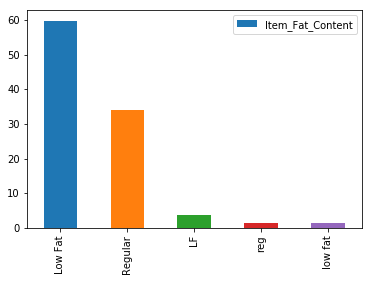

In [96]:
(data['Item_Fat_Content'].value_counts()/data['Item_Fat_Content'].count()*100).plot(kind='bar',legend=True)

* Here Our Common intuition tells us that LF, low fat refers to 'LOW Fat'. Similarly reg refers to 'Regular'.So lets assign them correct values

In [97]:
data.loc[data['Item_Fat_Content']=='LF','Item_Fat_Content']='Low Fat'
data.loc[data['Item_Fat_Content']=='low fat','Item_Fat_Content']='Low Fat'
data.loc[data['Item_Fat_Content']=='reg','Item_Fat_Content']='Regular'

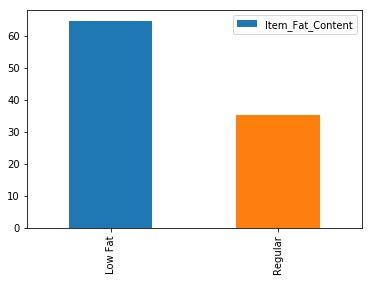

In [98]:
(data['Item_Fat_Content'].value_counts()/data['Item_Fat_Content'].count()*100).plot(kind='bar',legend=True)

* Low Fat , LF and low fat are same thing

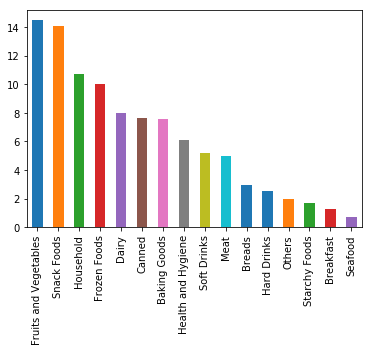

In [99]:
(data['Item_Type'].value_counts()/data['Item_Type'].count()*100).plot(kind='bar')

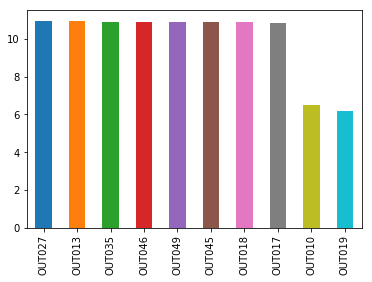

In [100]:
(data['Outlet_Identifier'].value_counts()/data['Outlet_Identifier'].count()*100).plot(kind='bar')

In [101]:
#data['Outlet_Identifier']=le.fit_transform(data['Outlet_Identifier'])

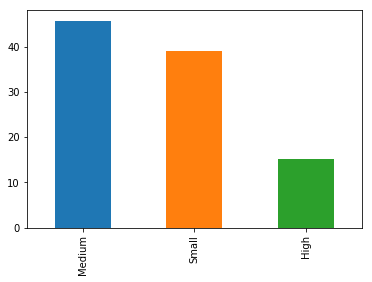

In [102]:
(data['Outlet_Size'].value_counts()/data['Outlet_Size'].count()*100).plot(kind='bar')

In [103]:
data['Outlet_Size'].isnull().sum(),data['Item_Weight'].isnull().sum()



(2410, 1463)

* We can fill these Null values with 'Mode'. It is one of the imputation method. There are other methods as well for imputation . We can use 'KNN' also for imputation of missing values. 

In [104]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode().iloc[0],inplace=True)

In [105]:
data['Item_Weight'].fillna((data['Item_Weight'].mean()), inplace=True)

In [106]:
#data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])

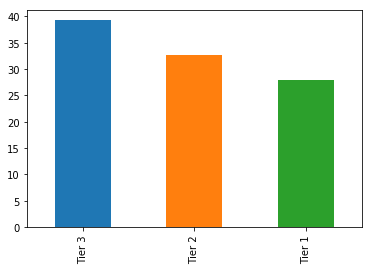

In [107]:
(data['Outlet_Location_Type'].value_counts()/data['Outlet_Location_Type'].count()*100).plot(kind='bar')

In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [112]:
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])
data['Item_Identifier']=le.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=le.fit_transform(data['Item_Type'])
data['Outlet_Type']=le.fit_transform(data['Outlet_Type'])
data['Outlet_Establishment_Year'] = 2013 - data['Outlet_Establishment_Year']


In [113]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.3,0,0.016047,4,249.8092,OUT049,14,Medium,0,1,3735.138


* Create Dummy Variables for Categorical features

In [114]:
df_cat1=pd.get_dummies(data)

In [115]:
#df_cat1.head(1)
df_cat1.dropna(inplace=True)

In [116]:
Y=df_cat1.loc[:,'Item_Outlet_Sales']
X=df_cat1.loc[:, df_cat1.columns != 'Item_Outlet_Sales']

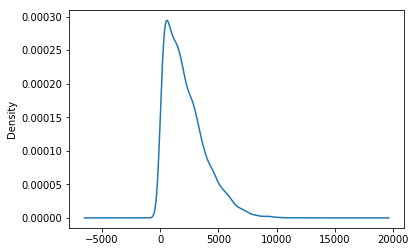

In [117]:
Y.plot(kind='kde')

In [118]:
Y.skew()

1.1775306028542798

In [119]:
LogY=np.log(Y)

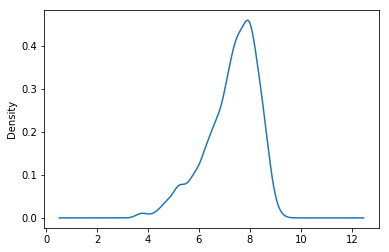

In [120]:
LogY.plot(kind='kde')

In [121]:
LogY.skew()

-0.887753343209305

* Accepted range of skewness is -1 to +1

* Now, we will scale our data so as to avoid Biased results

In [144]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

* using Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [146]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [153]:
regressor.score(X_train,Y_train),regressor.score(X_test,Y_test)

(0.5653415470053023, 0.5575776133328816)

In [154]:
predictions=regressor.predict(X_test)

In [155]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error : " + str(mean_absolute_error(Y_test,predictions)))
print("Mean Squared Error : " + str(mean_squared_error(Y_test,predictions)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(Y_test,predictions))))

Mean Absolute Error : 833.0139238656534
Mean Squared Error : 1240647.7149335297
Root Mean Squared Error : 1113.8436671874244


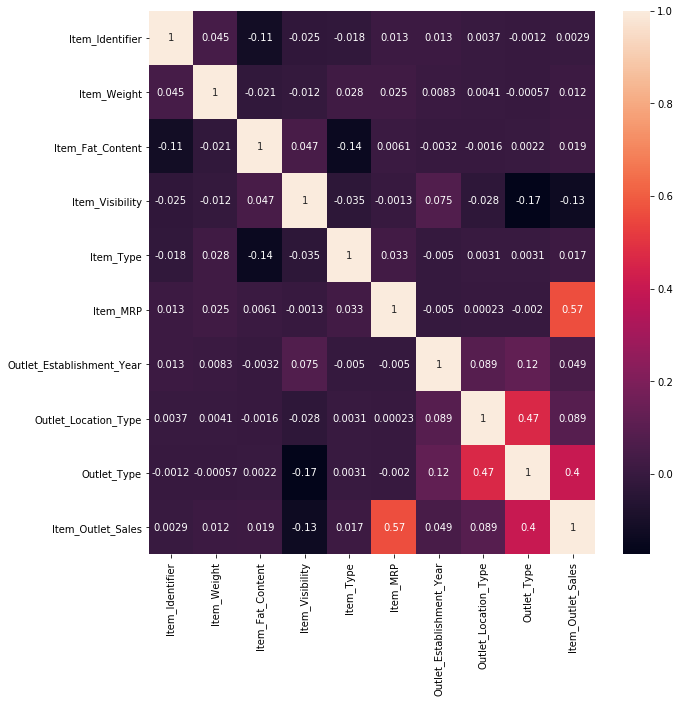

In [156]:
import seaborn as sns
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

In [157]:
data2=data.drop(columns='Item_Outlet_Sales')
data2corr=data2.corr()
data2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [159]:
VIF = np.linalg.inv(data2corr)
VIF.diagonal()

array([1.017328  , 1.00372222, 1.03644804, 1.04861941, 1.02384747,
       1.0019836 , 1.02645598, 1.2853446 , 1.33869746])

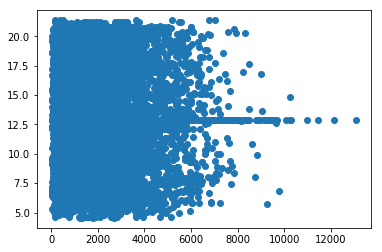

In [160]:
plt.scatter(data['Item_Outlet_Sales'],data['Item_Weight'])

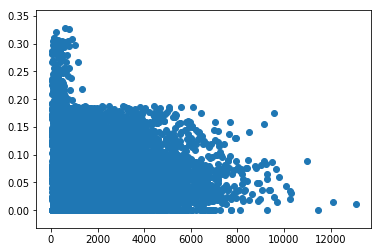

In [161]:
plt.scatter(data['Item_Outlet_Sales'],data['Item_Visibility'])

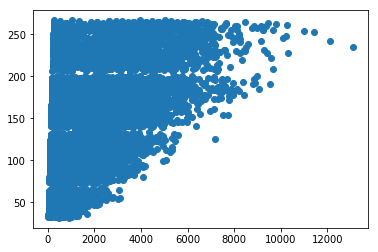

In [162]:
plt.scatter(data['Item_Outlet_Sales'],data['Item_MRP'])

In [163]:
l1=LinearRegression()

In [166]:
x_train,x_test,y_train,y_test=train_test_split(X,LogY)

In [167]:
l1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
l1.score(x_train,y_train),l1.score(x_test,y_test)

(0.7232230466087919, 0.7120218454900319)

In [180]:
predictions=l1.predict(x_test)

In [181]:
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,predictions)))
print("Mean Squared Error : " + str(mean_squared_error(y_test,predictions)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_test,predictions))))

Mean Absolute Error : 0.42168839935911634
Mean Squared Error : 0.29761645265299735
Root Mean Squared Error : 0.5455423472591265


In [182]:
data1.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [183]:
data1.loc[data['Item_Fat_Content']=='LF','Item_Fat_Content']='Low Fat'
data1.loc[data['Item_Fat_Content']=='low fat','Item_Fat_Content']='Low Fat'
data1.loc[data['Item_Fat_Content']=='reg','Item_Fat_Content']='Regular'

In [185]:
data1['Outlet_Size'].fillna(data['Outlet_Size'].mode().iloc[0],inplace=True)

In [187]:
data1['Item_Weight'].fillna((data['Item_Weight'].mean()), inplace=True)

In [188]:
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [189]:
data2=pd.get_dummies(data1)

In [190]:
Y=data2.loc[:,'Item_Outlet_Sales']
X=data2.loc[:, data2.columns != 'Item_Outlet_Sales']

In [209]:
x_train,x_test,y_train,y_test=train_test_split(X,np.log(Y))

In [210]:
regressor2=LinearRegression()

In [211]:
regressor2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [212]:
regressor2.score(x_train,y_train),regressor2.score(x_test,y_test)

(0.8078235173400845, 0.6648291238218669)

In [213]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [221]:
ls=Lasso()


In [224]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(x_train,y_train)
ls.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
ls.fit(x_train, y_train)
print("mse = ",metrics.mean_squared_error(y_test, ls.predict(x_test)))
print("Rmse =",np.sqrt(metrics.mean_squared_error(y_test, ls.predict(x_test))))
print("best model coefficients:")
pd.Series(ls.coef_, index=x_train.columns)

Alpha= 0.0001786567314184509
mse =  0.29374272773224014
Rmse = 0.5419803757814854
best model coefficients:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Item_Weight                       -0.001483
Item_Visibility                    0.000000
Item_MRP                           0.008155
Outlet_Establishment_Year         -0.001914
Item_Identifier_DRA12              0.000000
Item_Identifier_DRA24             -0.000000
Item_Identifier_DRA59             -0.048632
Item_Identifier_DRB01             -0.500420
Item_Identifier_DRB13             -0.000000
Item_Identifier_DRB24             -0.000000
Item_Identifier_DRB25              0.000000
Item_Identifier_DRB48             -0.000000
Item_Identifier_DRC01             -0.000000
Item_Identifier_DRC12             -0.057934
Item_Identifier_DRC13             -0.000000
Item_Identifier_DRC24              0.000000
Item_Identifier_DRC25              0.000000
Item_Identifier_DRC27             -0.297903
Item_Identifier_DRC36             -0.000000
Item_Identifier_DRC49              0.000000
Item_Identifier_DRD01             -0.000000
Item_Identifier_DRD12              0.000000
Item_Identifier_DRD13           

In [225]:
ls.score(x_train,y_train),ls.score(x_test,y_test)

(0.7655242192496734, 0.7247651993782336)

In [226]:
y_Predicted=ls.predict(x_test)

Text(0.5,1,'Residual plot')

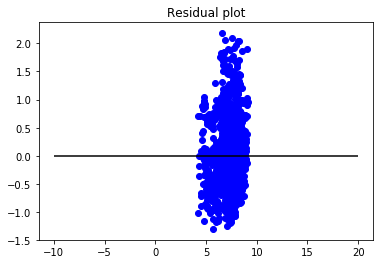

In [231]:
##residual plot
import matplotlib.pyplot as plt
%matplotlib inline

x_plot = plt.scatter(y_Predicted, (y_Predicted - y_test), c='b')

plt.hlines(y=0, xmin= -10, xmax=20)

plt.title('Residual plot')

In [235]:
residual=y_test-y_Predicted

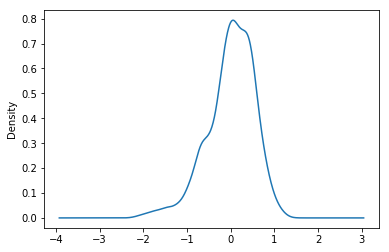

In [237]:
residual.plot(kind='kde')

In [238]:
r2=Ridge()
alphas = 10**np.linspace(6,-2,50)*0.5

In [239]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(x_train, y_train)
print("Alpha=", ridgecv.alpha_)
ridge6 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge6.fit(x_train, y_train)
print("mse = ",metrics.mean_squared_error(y_test, ridge6.predict(x_test)))
print("best model coefficients:")
pd.Series(ridge6.coef_, index=x_train.columns)

Alpha= 0.21459671300643934
mse =  0.3393816968275343
best model coefficients:


Item_Weight                       -0.000297
Item_Visibility                   -0.655192
Item_MRP                           0.003723
Outlet_Establishment_Year          0.001196
Item_Identifier_DRA12              0.154516
Item_Identifier_DRA24             -0.039212
Item_Identifier_DRA59              0.021442
Item_Identifier_DRB01             -0.621749
Item_Identifier_DRB13              0.011245
Item_Identifier_DRB24              0.031496
Item_Identifier_DRB25              0.002831
Item_Identifier_DRB48             -0.515755
Item_Identifier_DRC01             -0.493065
Item_Identifier_DRC12             -0.150392
Item_Identifier_DRC13             -0.300888
Item_Identifier_DRC24              0.000000
Item_Identifier_DRC25             -0.150339
Item_Identifier_DRC27             -0.144594
Item_Identifier_DRC36             -0.094996
Item_Identifier_DRC49              0.277299
Item_Identifier_DRD01             -0.393982
Item_Identifier_DRD12             -0.039709
Item_Identifier_DRD13           

In [240]:
ridge6.score(x_train,y_train),ridge6.score(x_test,y_test)

(0.7990964572253901, 0.6820018170929825)